In [2]:
import pandas as pd
# import train test split
from sklearn.model_selection import train_test_split
import torch

df = pd.read_csv("Car details v3.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
df["engine"]=df["engine"].str.split(" ", expand=True)[0]
df["max_power"]=df["max_power"].str.split(" ", expand=True)[0]
df["mileage"]=df["mileage"].str.split(" ", expand=True)[0]

In [4]:
len(df["name"].unique())

2058

In [5]:
df["brand"]=df["name"].str.split(" ", expand=True)[0]
df["model"]=df["name"].str.split(" ", expand=True)[1]

In [6]:
df = df.drop("name", axis=1)
df = df.drop("torque", axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   object 
 4   seller_type    8128 non-null   object 
 5   transmission   8128 non-null   object 
 6   owner          8128 non-null   object 
 7   mileage        7907 non-null   object 
 8   engine         7907 non-null   object 
 9   max_power      7913 non-null   object 
 10  seats          7907 non-null   float64
 11  brand          8128 non-null   object 
 12  model          8128 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [8]:
# convert mileage, engine, max_power to float
df["mileage"] = df["mileage"].astype(float)
df["engine"] = df["engine"].astype(float)

In [9]:
# replace empty string with mean of max_power
df["max_power"] = df["max_power"].replace("", 100)
df["max_power"] = df["max_power"].astype(float)

In [10]:
# fill missing values
df["engine"] = df["engine"].fillna(df["engine"].mean())
df["max_power"] = df["max_power"].fillna(df["max_power"].mean())
df["mileage"] = df["mileage"].fillna(df["mileage"].mean())
df["seats"] = df["seats"].fillna(df["seats"].mean())

In [11]:
import numpy as np
y = df["selling_price"]
y = np.log(y)
df = df.drop("selling_price", axis=1)

In [12]:
df.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand,model
0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,Maruti,Swift
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda,Rapid
2,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,Honda,City
3,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,Hyundai,i20
4,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,Maruti,Swift


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          8128 non-null   int64  
 1   km_driven     8128 non-null   int64  
 2   fuel          8128 non-null   object 
 3   seller_type   8128 non-null   object 
 4   transmission  8128 non-null   object 
 5   owner         8128 non-null   object 
 6   mileage       8128 non-null   float64
 7   engine        8128 non-null   float64
 8   max_power     8128 non-null   float64
 9   seats         8128 non-null   float64
 10  brand         8128 non-null   object 
 11  model         8128 non-null   object 
dtypes: float64(4), int64(2), object(6)
memory usage: 762.1+ KB


In [14]:
# convert categorical data to numerical data with sklearn LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = encoder.fit_transform(df[col])
df.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand,model
0,2014,145500,1,1,1,0,23.40,1248.0,74.00,5.0,20,161
1,2014,120000,1,1,1,2,21.14,1498.0,103.52,5.0,27,135
2,2006,140000,3,1,1,4,17.70,1497.0,78.00,5.0,10,36
3,2010,127000,1,1,1,0,23.00,1396.0,90.00,5.0,11,206
4,2007,120000,3,1,1,0,16.10,1298.0,88.20,5.0,20,161


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.048464,1.338363,-0.889115,0.277607,0.385158,-0.666639,0.999896,-0.423804,-0.495710,-0.440324,0.272216,0.814603
1,0.048464,0.887411,-0.889115,0.277607,0.385158,0.970600,0.432289,0.079227,0.339576,-0.440324,1.222516,0.413031
2,-1.929775,1.241098,1.106392,0.277607,0.385158,2.607839,-0.431678,0.077215,-0.382528,-0.440324,-1.085356,-1.116034
3,-0.940656,1.011202,-0.889115,0.277607,0.385158,-0.666639,0.899435,-0.126009,-0.042981,-0.440324,-0.949599,1.509633
4,-1.682495,0.887411,1.106392,0.277607,0.385158,-0.666639,-0.833524,-0.323198,-0.093913,-0.440324,0.272216,0.814603


In [16]:
#df = df[:1000]
#y = y[:1000]

In [17]:
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)
x_train = torch.tensor(x_train.values, dtype=torch.float)
x_test = torch.tensor(x_test.values, dtype=torch.float)
y_train = torch.tensor(y_train.values, dtype=torch.float)
y_test= torch.tensor(y_test.values, dtype=torch.float)

In [18]:
class MySimpleNN(torch.nn.Module):   # MySimpleNN erbt von torch.nn.Module

    # Konstruktor
    def __init__(self, input_size=10, hidden_size=(10, 20, 10), output_size=1):
        # Aufruf des Superkonstruktors von torch.nn.Module
        super(MySimpleNN, self).__init__()
        self.fc1 = torch.nn.Linear(input_size, hidden_size[0])
        self.fc2 = torch.nn.Linear(hidden_size[0], hidden_size[1])
        self.fc3 = torch.nn.Linear(hidden_size[1], hidden_size[2])
        self.fc4 = torch.nn.Linear(hidden_size[2], output_size)

        # Batch Normalization
        self.bn1 = torch.nn.BatchNorm1d(hidden_size[0])
        self.bn2 = torch.nn.BatchNorm1d(hidden_size[1])
        self.bn3 = torch.nn.BatchNorm1d(hidden_size[2])

    # forward Methode -> Forward Propagation
    # wenn ich später ein Objekt von MySimpleNN erzeuge, dann kann ich
    # dieses Objekt mit einem Tensor aufrufen, dann wird die forward Methode
    # aufgerufen. z.B. model(x_train)
    def forward(self, xb):   # xb steht für eine Batch von X-Werten
        #print("xb", xb.shape)
        z2 = self.fc1(xb)  # dahinter steckt x@w1 + b1
        a2 = torch.relu(z2)    # alle negativen Werte werden auf 0 gesetzt, der Rest bleibt
        #print("a2", a2.shape)
        a2_bn = self.bn1(a2) # Normalisierung der Werte auf den Neuronen
        #print("a2_bn", a2_bn.shape)
        z3 = self.fc2(a2_bn) # dahinter steckt a2@w2 + b2
        #print("z3", z3.shape)
        a3 = torch.relu(z3)
        #print("a3", a3.shape)
        a3_bn = self.bn2(a3)
        #print("a3_bn", a3_bn.shape)
        z4 = self.fc3(a3_bn)
        #print("z4", z4.shape)
        a4 = torch.relu(z4)
        #print("a4", a4.shape)
        a4_bn = self.bn3(a4)
        #print("a4_bn", a4_bn.shape)
        y_hat = torch.relu(self.fc4(a4_bn))
        #print("y_hat", y_hat.shape)
        return y_hat

In [19]:
def get_batch(x, y, batch_size):
    # z.B. range(0, 10, 3) --> 0, 3, 6, 9
    # range(start, stop, step)
    for i in range(0, len(x), batch_size):
        # yield: gibt den Wert zurück, aber merkt sich den aktuellen Zustand
        yield x[i:i+batch_size], y[i:i+batch_size]

In [20]:
xb, yb = next(get_batch(x_train, y_train, batch_size=100))
model = MySimpleNN(input_size=12, hidden_size=(30, 40, 10), output_size=1)
print(model(xb).shape)

torch.Size([100, 1])


Epoch:  0 Loss:  0.6619468625601678 current_lr:  0.0001
Epoch:  10 Loss:  0.6001800659142139 current_lr:  0.0001
Epoch:  20 Loss:  0.5558784670259211 current_lr:  0.0001
Epoch:  30 Loss:  0.5169683671738323 current_lr:  0.0001
Epoch:  40 Loss:  0.4798012178738423 current_lr:  0.0001
Epoch:  50 Loss:  0.44474603916380595 current_lr:  0.0001
Epoch:  60 Loss:  0.41121522333760585 current_lr:  0.0001
Epoch:  70 Loss:  0.3772327971069749 current_lr:  0.0001
Epoch:  80 Loss:  0.3437977805206571 current_lr:  0.0001
Epoch:  90 Loss:  0.3149033062130222 current_lr:  0.0001
Epoch:  100 Loss:  0.28908620603779067 current_lr:  0.0001
Epoch:  110 Loss:  0.2660132795068089 current_lr:  0.0001
Epoch:  120 Loss:  0.24192178891057858 current_lr:  0.0001
Epoch:  130 Loss:  0.22043234955087437 current_lr:  0.0001
Epoch:  140 Loss:  0.19472605688540395 current_lr:  0.0001
Epoch:  150 Loss:  0.16634605921660522 current_lr:  0.0001
Epoch:  160 Loss:  0.14098260997442494 current_lr:  0.0001
Epoch:  170 Loss:

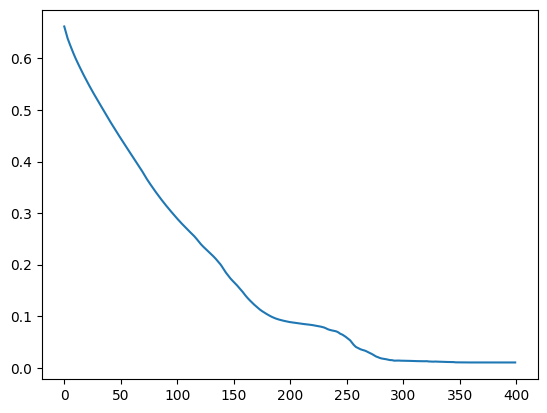

In [42]:
# eigenes Modell wird erstellt
model = MySimpleNN(input_size=12, hidden_size=(30, 40, 10), output_size=1)
lr=0.0001
# trainiere immer mit 10 Datensätzen auf einmal
batch_size=256

# loss function
# Mean Squared Error
# die Lossfunction von Pytorch müssen erstmal erstellt werden mit ()
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
# lernrate scheduler


scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3)

def train(xb, yb):
    y_hat=model(xb)
    loss = loss_fn(y_hat, yb)
    loss.backward()
    optimizer.step()
    return loss.item()

losses=[]
# import tqdm notebook
for epoch in range(400):
    loss_sum=0
    # Iteration über alle Batches
    for xb, yb in get_batch(x_train, y_train, batch_size):
        loss_sum += train(xb, yb)
    loss_epoch=loss_sum/len(x_train)
    losses.append(loss_epoch)
    scheduler.step(loss_epoch)
    if epoch % 10 == 0:
        print("Epoch: ", epoch, "Loss: ", loss_epoch, "current_lr: ", optimizer.param_groups[0]['lr'])

#plot
import matplotlib.pyplot as plt
plt.plot(losses)

In [43]:
xb, yb = next(get_batch(x_train, y_train, batch_size=100))
y_preds=model(xb)
for i in range(10):
    print("Vorhersage:", np.exp(y_preds[i].item()), "Tatsächlicher Wert:", np.exp(yb[i].item()))


Vorhersage: 1991448.0526726323 Tatsächlicher Wert: 519999.9011449155
Vorhersage: 1379919.9509447413 Tatsächlicher Wert: 300000.0539133862
Vorhersage: 2328724.9672785243 Tatsächlicher Wert: 379999.8510890395
Vorhersage: 2344347.4824270736 Tatsächlicher Wert: 530000.1620312294
Vorhersage: 2120613.3471424994 Tatsächlicher Wert: 334999.9565656248
Vorhersage: 2808306.1870698584 Tatsächlicher Wert: 79999.97254228884
Vorhersage: 1530961.367378938 Tatsächlicher Wert: 399999.87473975326
Vorhersage: 2695035.565066562 Tatsächlicher Wert: 1000000.1918526388
Vorhersage: 1477614.1629237891 Tatsächlicher Wert: 2174999.154171467
Vorhersage: 1362941.0354896386 Tatsächlicher Wert: 499999.8565554246


In [44]:
# testen des Modells
x_test_preds=model(x_test)

# abweichung der Vorhersage vom tatsächlichen Wert
diff=torch.abs(x_test_preds-y_test)
print("Durchschnittliche Abweichung:", torch.mean(diff).item())


Durchschnittliche Abweichung: 0.849487841129303


Bad pipe message: %s [b'h', b'\x96\xce\xe6\xf6\xc0\xaa,\xdf\xfci\xc7\x9c\x8b\xa6Y kz\\\x14:\xc7 .b\x82\xa6d\xfe\xe5\xbbE1V\xd2\x87|7\x92i\xeb\x06\x1e\xdam:k\x0c\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b', b'\x08\x05\x08\x06\x04\x01\x05']
Bad pipe message: %s [b'']
Bad pipe message: %s [b'']
Bad pipe message: %s [b'\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003\x00&\x00$\x00\x1d\x00 7\x9f\xbc9\x9e~\x066!\xdb\xa6\x1a\x8ce\xd1\x8a\xc9e$\x86\x80\xb6']
Bad pipe message: %s [b"\xa6\x07D\x87\x02\xe6jN\xff\x95\x9fm\xe9\xf7\x15\xf4\x0c\x8a\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\x